In [22]:
import pandas as pd

# Load the CSV file
csv_file_path = './performance_log.csv'
weak_csv_file_path = './weak_scalability_log.csv'
data = pd.read_csv(csv_file_path)
data_weak = pd.read_csv(weak_csv_file_path)

# Display the first few rows of the dataframe
print(data.head(20))

       time  proc  dim_x  dim_y  solver  prec
0   130.491   128    100     70       0     1
1   128.553   128    100     70       0     1
2   130.762   128    100     70       0     1
3   127.662   128    100     70       0     1
4   184.801    64    100     70       0     1
5   156.006    64    100     70       0     1
6   156.436    64    100     70       0     1
7   162.737    64    100     70       0     1
8   229.312    32    100     70       0     1
9   253.975    32    100     70       0     1
10  242.470    32    100     70       0     1
11  268.695    32    100     70       0     1
12  224.456    32    100     70       0     1
13  227.207    32    100     70       0     1
14  280.260    32    100     70       0     1
15  705.905    16    100     70       0     1
16  898.109    16    100     70       0     1
17  922.605    16    100     70       0     1
18  944.780    16    100     70       0     1
19  916.710    16    100     70       0     1


# STRONG SCALABILITY
The strong scalability tests that follow (specifically those with GMRES and FGMRES
with BlockTriangular preconditioner) have been run with the following parameters:
- 1 node
- mesh size: 100x70 => 7000 cells => 154244 degrees of freedom
- tolerance: 1e-12
- velocity polynomial degree: 3
- pressure polynomial degree: 2
- target Re: 100

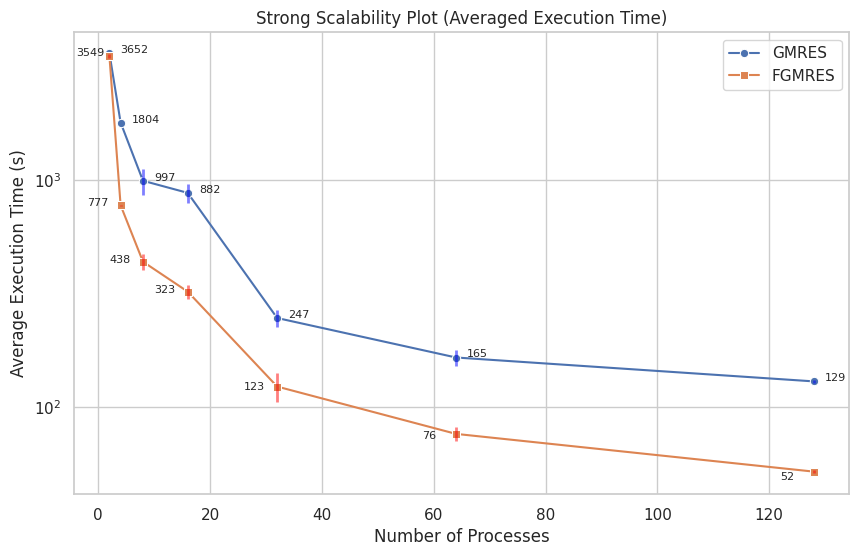

In [36]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the CSV file (assuming no headers in the original file)
column_names = ['time', 'proc', 'dim_x', 'dim_y', 'solver', 'prec']

# Compute the average execution time and standard deviation
stats_data = data.groupby(['proc', 'solver', 'prec'], as_index=False).agg(
    avg_time=('time', 'mean'),
    std_time=('time', 'std')
)

# Create the plot
plt.figure(figsize=(10, 6))
sns.set(style="whitegrid")

# Plot GMRES (solver=0)
gmres_data = stats_data[(stats_data['solver'] == 0) & (stats_data['prec'] == 1)]
ax = sns.lineplot(x='proc', y='avg_time', data=gmres_data, marker='o', label='GMRES')

# Plot FGMRES (solver=1)
fgmres_data = stats_data[(stats_data['solver'] == 1) & (stats_data['prec'] == 1)]
sns.lineplot(x='proc', y='avg_time', data=fgmres_data, marker='s', label='FGMRES')

# Add error bars (standard deviation as vertical lines)
for _, row in gmres_data.iterrows():
    plt.vlines(x=row['proc'], ymin=row['avg_time'] - row['std_time'], ymax=row['avg_time'] + row['std_time'], colors='blue', alpha=0.5, linewidth=2)

for _, row in fgmres_data.iterrows():
    plt.vlines(x=row['proc'], ymin=row['avg_time'] - row['std_time'], ymax=row['avg_time'] + row['std_time'], colors='red', alpha=0.5, linewidth=2)

# Add title and labels
ax.set_title('Strong Scalability Plot (Averaged Execution Time)')
ax.set_xlabel('Number of Processes')
ax.set_ylabel('Average Execution Time (s)')

# Annotate average execution times
for i in range(len(gmres_data)):
    ax.text(gmres_data['proc'].iloc[i] + 2, gmres_data['avg_time'].iloc[i] + 1.0, f"{gmres_data['avg_time'].iloc[i]:.0f}", fontsize=8)

for i in range(len(fgmres_data)):
    ax.text(fgmres_data['proc'].iloc[i] - 6, fgmres_data['avg_time'].iloc[i] - 4.0, f"{fgmres_data['avg_time'].iloc[i]:.0f}", fontsize=8)

# Log scale on y-axis
plt.yscale('log')

# Show the plot
plt.legend()
plt.show()


/tmp/ipykernel_70965/2548710620.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data_0['speedup'] = sequential_time_0 / filtered_data_0['time']
/tmp/ipykernel_70965/2548710620.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data_1['speedup'] = sequential_time_1 / filtered_data_1['time']


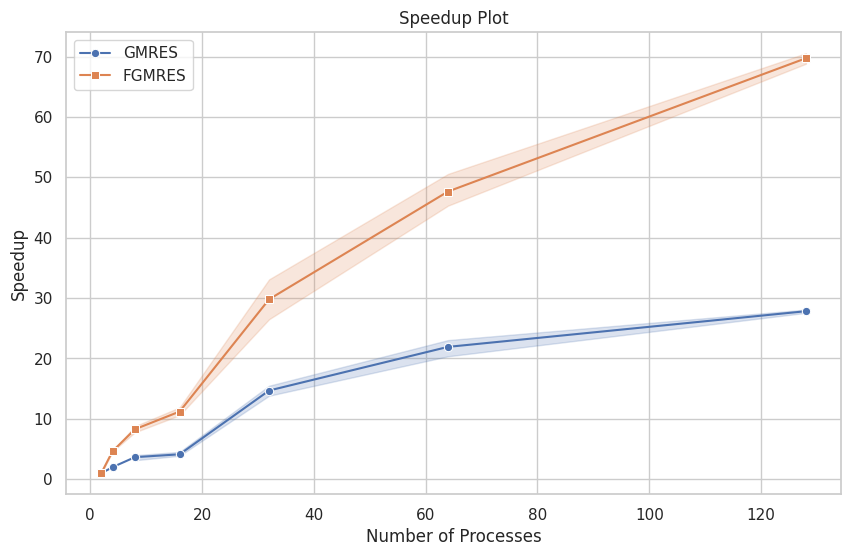

In [19]:
import seaborn as sns

import matplotlib.pyplot as plt

# Compute speedup for solver=0
sequential_time_0 = 3600.0
filtered_data_0 = data[(data['solver'] == 0) & (data['prec'] == 1)]
filtered_data_1 = data[(data['solver'] == 1) & (data['prec'] == 1)]
filtered_data_0['speedup'] = sequential_time_0 / filtered_data_0['time']

# Compute speedup for solver=1
sequential_time_1 = 3600.0
filtered_data_1['speedup'] = sequential_time_1 / filtered_data_1['time']

# Create the plot
plt.figure(figsize=(10, 6))
sns.set(style="whitegrid")

# Plot speedup for solver=0
ax = sns.lineplot(x='proc', y='speedup', data=filtered_data_0, marker='o', label='GMRES')

# Plot speedup for solver=1
sns.lineplot(x='proc', y='speedup', data=filtered_data_1, marker='s', label='FGMRES')

# Add title and labels
ax.set_title('Speedup Plot')
ax.set_xlabel('Number of Processes')
ax.set_ylabel('Speedup')

# annotate the speedup on each point
# for i in range(len(filtered_data_0)):
#     ax.text(filtered_data_0['proc'].iloc[i], filtered_data_0['speedup'].iloc[i] + 1.0, round(filtered_data_0['speedup'].iloc[i], 2), fontsize=8)
# for i in range(len(filtered_data_1)):
#     ax.text(filtered_data_1['proc'].iloc[i], filtered_data_1['speedup'].iloc[i] + 1.0, round(filtered_data_1['speedup'].iloc[i], 2), fontsize=8)

# Show the plot
plt.legend()
plt.show()

# WEAK SCALBILITY
Increase the size of the problem as the number of processes increases.
1 process : 16x10 = 160 \
2 process: 20x16 = 320 \
4 processes: 32x20 = 640 \
8 processes: 40x32 = 1280 \
16 processes: 64x40 = 2560 \
32 processes: 80x64 = 5120 \
64 processes: 128x80 = 10240 \
128 processes: 160x128 = 20480 

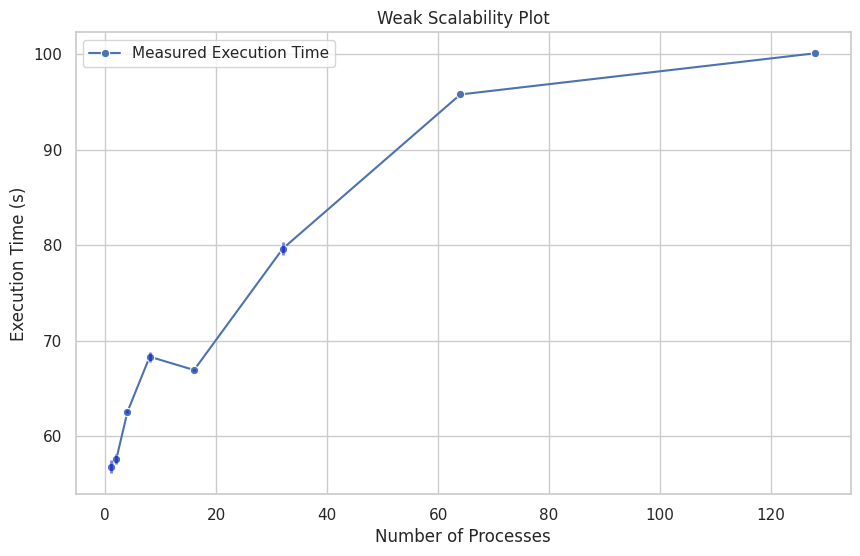

In [37]:
import numpy as np

# Compute the average execution time and standard deviation for each proc value
stats_data = data_weak.groupby('proc', as_index=False).agg(
    avg_time=('time', 'mean'),
    std_time=('time', 'std')
)

# Create the plot
plt.figure(figsize=(10, 6))
sns.set(style="whitegrid")

# Plot execution time with error bars
ax = sns.lineplot(x='proc', y='avg_time', data=stats_data, marker='o', label='Measured Execution Time')

# Add error bars (vertical lines showing standard deviation)
for _, row in stats_data.iterrows():
    plt.vlines(x=row['proc'], ymin=row['avg_time'] - row['std_time'], 
               ymax=row['avg_time'] + row['std_time'], colors='blue', alpha=0.5, linewidth=2)

# Add title and labels
ax.set_title('Weak Scalability Plot')
ax.set_xlabel('Number of Processes')
ax.set_ylabel('Execution Time (s)')

# Show legend
plt.legend()

# Show the plot
plt.show()